In [11]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Cargar modelo base
modelo_base = load_model("modelo_ejercicios.h5")
modelo_base.trainable = False  # Congelar capas

# 2. Crear nueva entrada y pasarla por el modelo
entrada = Input(shape=(128, 128, 3))  # Asegúrate que coincida con el input original
x = modelo_base(entrada, training=False)  # Usamos el modelo como función
x = Dropout(0.3)(x)
salida = Dense(22, activation='softmax')(x)

modelo_postura = Model(inputs=entrada, outputs=salida)

# 3. Compilar modelo nuevo
modelo_postura.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Dataset y entrenamiento (igual que antes)
data_dir = "dataset+"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

modelo_postura.fit(train_gen, validation_data=val_gen, epochs=10)

# 5. Guardar
modelo_postura.save("modelo_postura_cnn_transfer.h5")



Found 44338 images belonging to 22 classes.
Found 11074 images belonging to 22 classes.
Epoch 1/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 199s 143ms/step - accuracy: 0.4049 - loss: 2.7133 - val_accuracy: 0.6179 - val_loss: 2.2173
Epoch 2/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 197s 142ms/step - accuracy: 0.6817 - loss: 1.5975 - val_accuracy: 0.6190 - val_loss: 1.8032
Epoch 3/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 171s 123ms/step - accuracy: 0.6810 - loss: 1.2454 - val_accuracy: 0.6190 - val_loss: 1.6558
Epoch 4/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 182s 131ms/step - accuracy: 0.6853 - loss: 1.1361 - val_accuracy: 0.6198 - val_loss: 1.6053
Epoch 5/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 169s 122ms/step - accuracy: 0.6819 - loss: 1.1103 - val_accuracy: 0.6203 - val_loss: 1.5918
Epoch 6/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 159s 115ms/step - accuracy: 0.6892 - loss: 1.0832 - val_accuracy: 0.6201 - val_loss: 1.6000
Epoch 7/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 196s 142ms/step - accuracy: 0.6908 - loss: 1.0697 - val_accuracy: 

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,522,584 (24.88 MB)

 Trainable params: 6,522,134 (24.88 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predecir_y_mostrar(ruta_img, model, clases):
    # Cargar imagen y preparar entrada
    img = image.load_img(ruta_img, target_size=(128, 128))
    x = np.expand_dims(np.array(img) / 255.0, axis=0)

    # Predicción
    pred = model.predict(x)
    pred_index = np.argmax(pred)
    pred_clase = clases[pred_index]
    confianza = float(np.max(pred))

    # Mostrar imagen
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{pred_clase} ({confianza:.2f})", fontsize=14)
    plt.show()

    return pred_clase, confianza


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


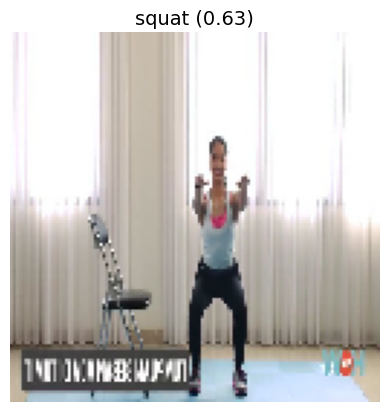

('squat', 0.6285544037818909)

In [51]:
# Cargar modelo (de 22 clases)
from tensorflow.keras.models import load_model

model = load_model("modelo_postura_cnn_transfer.h5")

clases = [
    'barbell biceps curl', 'bench press', 'chest fly machine', 'deadlift',
    'decline bench press', 'hammer curl', 'hip thrust', 'incline bench press',
    'lat pulldown', 'lateral raises', 'leg extension', 'leg raises', 'plank',
    'pull up', 'push up', 'romanian deadlift', 'russian twist', 'shoulder press',
    'squat', 't bar row', 'tricep dips', 'tricep pushdown'
]

# Imagen a predecir
ruta = "C:/Users/Anibal M/Desktop/hito 2 ML/dataset+/squat/squat_1900111_fliph.jpg"

predecir_y_mostrar(ruta, model, clases)
